In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('c:\\Users\\liohe\\Downloads\\weights_heights.csv.csv', index_col='Index')

In [3]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


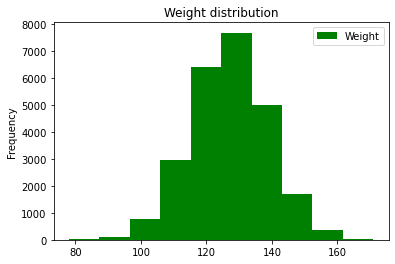

In [4]:
data.plot(y='Weight', kind='hist', color='green',  title='Weight distribution')

In [5]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

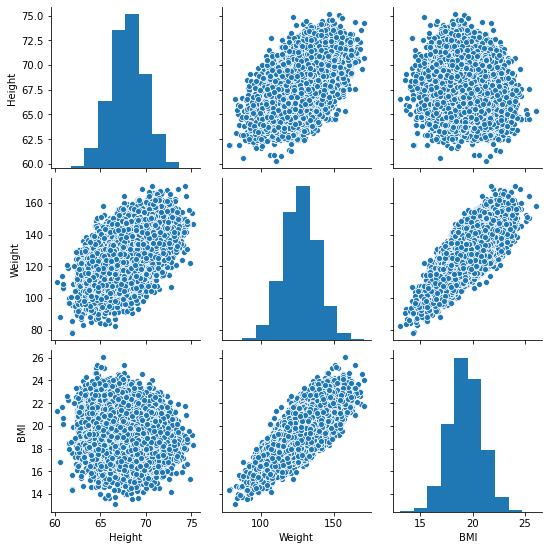

In [6]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'],row['Weight']), axis=1)
g = sns.pairplot(data)

[Text(0, 0.5, 'Рост'), Text(0.5, 0, 'Весовая категория')]

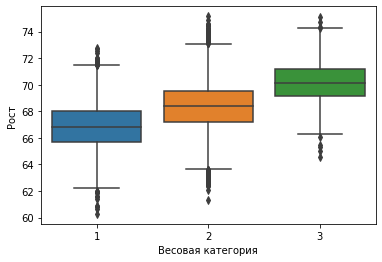

In [7]:
data = pd.read_csv('c:\\Users\\liohe\\Downloads\\weights_heights.csv.csv', index_col='Index')
def weight_category(weight):
    if weight < 120:
        res = 1
    elif weight >= 150:
        res = 3
    else:
        res = 2
    return res

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(data=data, x="weight_cat", y="Height").set(xlabel = u"Весовая категория", ylabel = u"Рост")

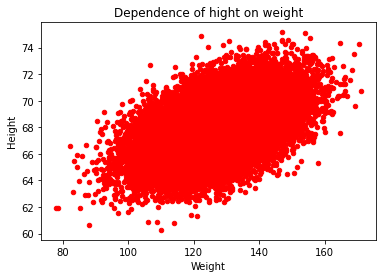

In [8]:
data = pd.read_csv('c:\\Users\\liohe\\Downloads\\weights_heights.csv.csv', index_col='Index')
data.plot(x='Weight',y='Height', kind='scatter', color='red',  title='Dependence of hight on weight')

In [9]:
def error(w0, w1):
    x = data['Weight']
    y = data['Height']
    res = 0
    for i in range(1, len(data.index)):
        res+=(y[i]-w0-w1*x[i])**2
    return res

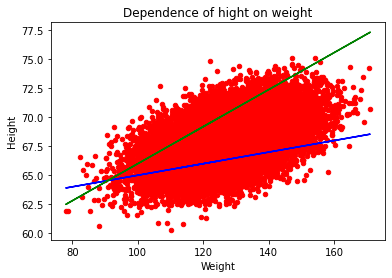

In [10]:
x=np.array(data['Weight'])

w0, w1 = 60, 0.05
y1 = [w0 + w1*k for k in x]

w0, w1 = 50, 0.16
y2 = [w0 + w1*k for k in x]

data.plot(x='Weight',y='Height', kind='scatter', color='red',  title='Dependence of hight on weight')
plt.plot(x, y1, color="blue")
plt.plot(x, y2, color="green")

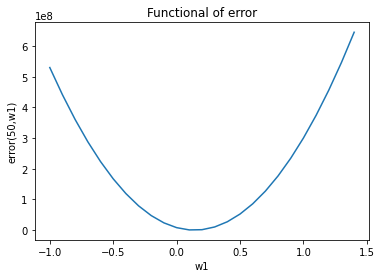

In [11]:
w0 = 50
w = np.arange(-1, 1.5, 0.1)
fix_err = [error(w0,w1) for w1 in w]

plt.title('Functional of error')
plt.xlabel('w1')
plt.ylabel('error(50,w1)')

plt.plot(w, fix_err)

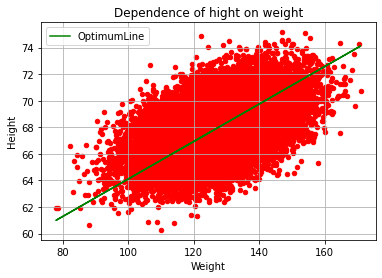

In [13]:
from scipy import optimize
from scipy.optimize import minimize_scalar

def fix_error(w1):
    return error(50,w1)

x_min = optimize.minimize_scalar(fix_error,[-5,5])

x = np.array(data['Weight'])
w1_opt = x_min.x

w0, w1 = 50, w1_opt
y = [w0 + w1*k for k in x]

data.plot(x='Weight',y='Height', kind='scatter', color='red',  title='Dependence of hight on weight')
plt.plot(x, y, color="green", label="OptimumLine")
plt.grid(True)
plt.legend(loc='upper left')

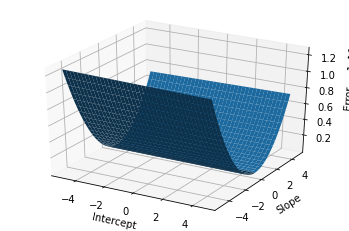

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
w0, w1 = np.meshgrid(w0, w1)
Z = error(w0,w1)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(w0, w1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [16]:
data = pd.read_csv('c:\\Users\\liohe\\Downloads\\weights_heights.csv.csv', index_col='Index')
from scipy import optimize
def new_error(w):
    new_res = 0.
    x = data['Weight']
    y = data['Height']
    for i in range(1,len(data.index)):
     new_res+=(y[i]-w[0]-w[1]*x[i])**2
    return new_res
    
min = optimize.minimize(new_error,np.array([0,0]), method = 'L-BFGS-B',bounds=((-100,100),(-5, 5)))

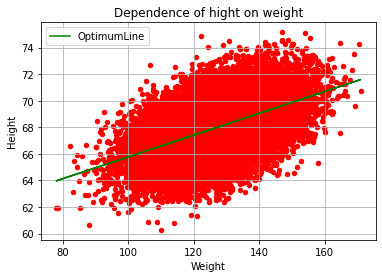

In [18]:
x = np.array(data['Weight'])

w0, w1 = min.x
y = [w0 + w1*k for k in x]

data.plot(x='Weight',y='Height', kind='scatter', color='red',  title='Dependence of hight on weight')
plt.plot(x, y, color="green", label="OptimumLine")
plt.legend(loc='upper left')
plt.grid(True)